In [1]:
import pandas as pd
import json
import re
import string
from transformers import pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

c:\Users\POS\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hanifnoerr = "hanifnoerr/Fine-tuned-Indonesian-Sentiment-Classifier"
hanifnoerr_model = pipeline(
    "sentiment-analysis",
    model=hanifnoerr,
    tokenizer=hanifnoerr,
    truncation=True,
     max_length=512
)
def analyze_sentiment_hanifnoerr(text):
    try:
        result = hanifnoerr_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

crypter70 = "crypter70/IndoBERT-Sentiment-Analysis"
crypter70_model = pipeline(
    "sentiment-analysis",
    model=crypter70,
    tokenizer=crypter70,
    truncation=True,
     max_length=512
)
def analyze_sentiment_crypter70(text):
    try:
        result = crypter70_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

w11wo = "w11wo/indonesian-roberta-base-sentiment-classifier"
w11wo_model = pipeline(
    "sentiment-analysis",
    model=w11wo,
    tokenizer=w11wo,
    truncation=True,
     max_length=512
)
def analyze_sentiment_w11wo(text):
    try:
        result = w11wo_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

ayameRushia = "ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa"
ayameRushia_model = pipeline(
    "sentiment-analysis",
    model=ayameRushia,
    tokenizer=ayameRushia,
    truncation=True,
     max_length=512
)
def analyze_sentiment_ayameRushia(text):
    try:
        result = ayameRushia_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

Aardiiiiy = "Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis"
Aardiiiiy_model = pipeline(
    "sentiment-analysis",
    model=Aardiiiiy,
    tokenizer=Aardiiiiy,
    truncation=True,
     max_length=512
)
def analyze_sentiment_Aardiiiiy(text):
    try:
        result = Aardiiiiy_model(str(text))[0]
        return result['label'], result['score']
    except:
        return 'error', 'error'

Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu
Device set to use cpu


CLEANING

In [3]:
data = pd.read_csv("dataset/Review KCU Pulau Jawa - with label.csv")  # Load the CSV file into a DataFrame

data = data.dropna(subset=['review_text'])  # Drop rows where 'review_text' is missing
data['review_text_cleaned'] = data['review_text'].astype(str).str.lower()  # Convert to string and lowercase
data['review_text_cleaned'] = [re.sub(r'\n', r' ', i) for i in data['review_text_cleaned']]  # Replace newline characters with spaces
# Fix typo word
with open("dataset/typo_dict.json", "r", encoding="utf-8") as f:
    typo_dict = json.load(f)
data['review_text_cleaned'] = data['review_text_cleaned'].apply(
    lambda x: ' '.join([typo_dict.get(word.lower(), word) for word in x.split()]))
def normalize_repeated_letters(text):
    return re.sub(r'(.)\1{2,}', r'\1', text)
data['review_text_cleaned'] = data['review_text_cleaned'].apply(normalize_repeated_letters)
def remove_double_vowels(text):
    return re.sub(r'([aeiou])\1+', r'\1', text)
data['review_text_cleaned'] = data['review_text_cleaned'].apply(remove_double_vowels)
data['review_text_cleaned'] = [re.sub(r'[^\x00-\x7f]',r'', i) for i in data['review_text_cleaned']]  # Remove non-ASCII characters
data['review_text_cleaned'] = data['review_text_cleaned'].apply(
    lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x))  # Remove punctuation
data['review_text_cleaned'] = data['review_text_cleaned'].apply(lambda x: re.sub(r'\d+', '', x))  # Remove numbers
data['review_text_cleaned'] = data['review_text_cleaned'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())  # Normalize whitespace
data = data[data['review_text_cleaned'] != ""]  # Remove rows where cleaned text is empty

HANIFNOERR

In [4]:
data[['sentiment_result_hanifnoerr', 'score_sentiment_result_hanifnoerr']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_hanifnoerr(x))
)
print(data['sentiment_result_hanifnoerr'].value_counts())

sentiment_result_hanifnoerr
negative    332
positive    302
neutral     159
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_27528\1922892403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')


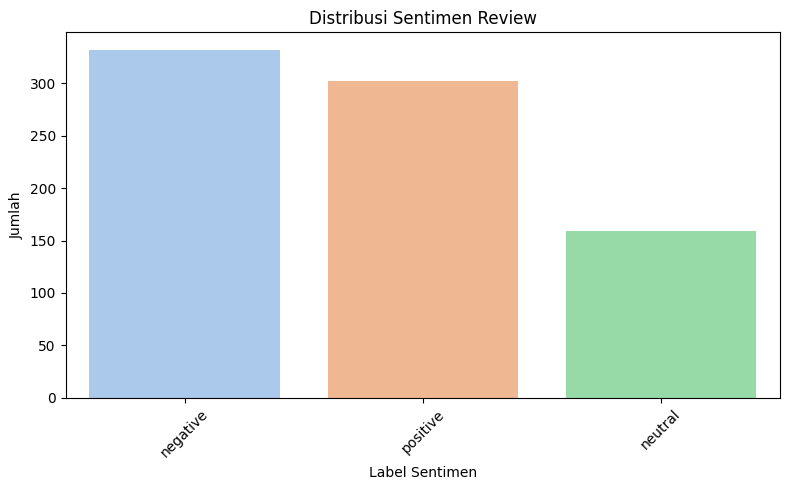

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

crypter70

In [6]:
data[['sentiment_result_crypter70', 'score_sentiment_result_crypter70']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_crypter70(x))
)
print(data['sentiment_result_crypter70'].value_counts())

sentiment_result_crypter70
NEGATIVE    326
POSITIVE    299
NEUTRAL     168
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_27528\3126681369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')


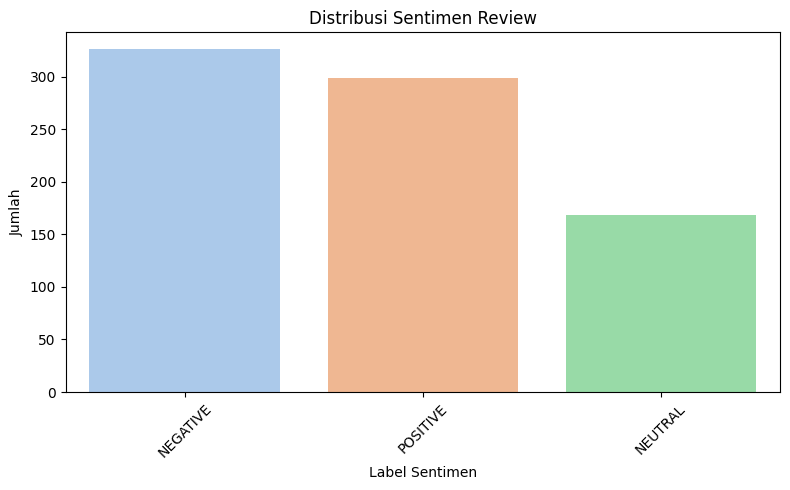

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

w11wo

In [8]:
data[['sentiment_result_w11wo', 'score_sentiment_result_w11wo']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_w11wo(x))
)
print(data['sentiment_result_w11wo'].value_counts())

sentiment_result_w11wo
negative    324
positive    300
neutral     169
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_27528\392182998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')


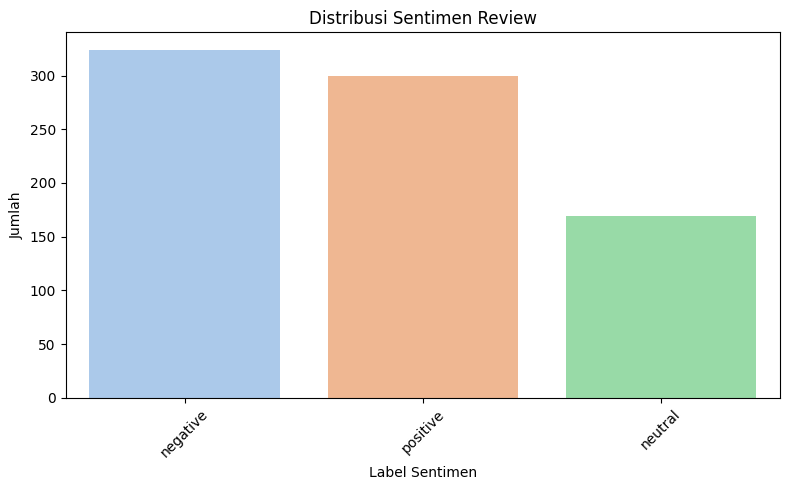

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
data[['sentiment_result_ayameRushia', 'score_sentiment_result_ayameRushia']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_ayameRushia(x))
)
print(data['sentiment_result_ayameRushia'].value_counts())

sentiment_result_ayameRushia
Negative    313
Positive    286
Neutral     194
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_27528\4168932491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_ayameRushia', order=data['sentiment_result_ayameRushia'].value_counts().index, palette='pastel')


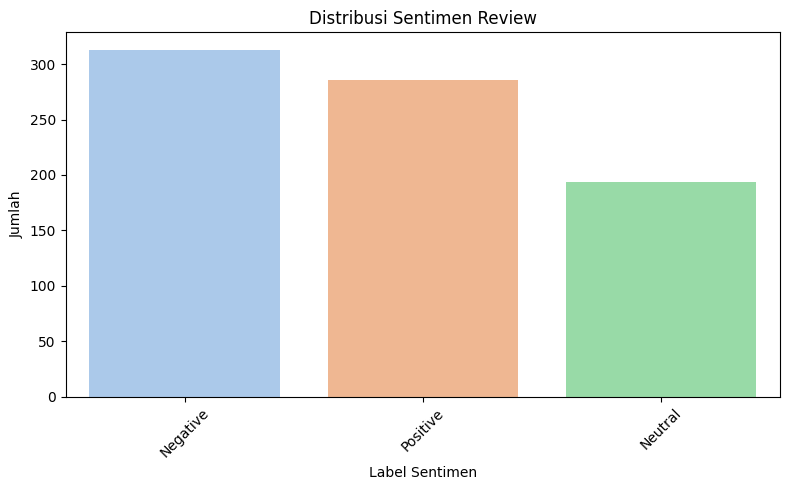

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_ayameRushia', order=data['sentiment_result_ayameRushia'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
data[['sentiment_result_Aardiiiiy', 'score_sentiment_result_Aardiiiiy']] = data['review_text_cleaned'].apply(
    lambda x: pd.Series(analyze_sentiment_Aardiiiiy(x))
)
print(data['sentiment_result_Aardiiiiy'].value_counts())

sentiment_result_Aardiiiiy
Negative    332
Neutral     249
Positive    212
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_27528\331142182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_Aardiiiiy', order=data['sentiment_result_Aardiiiiy'].value_counts().index, palette='pastel')


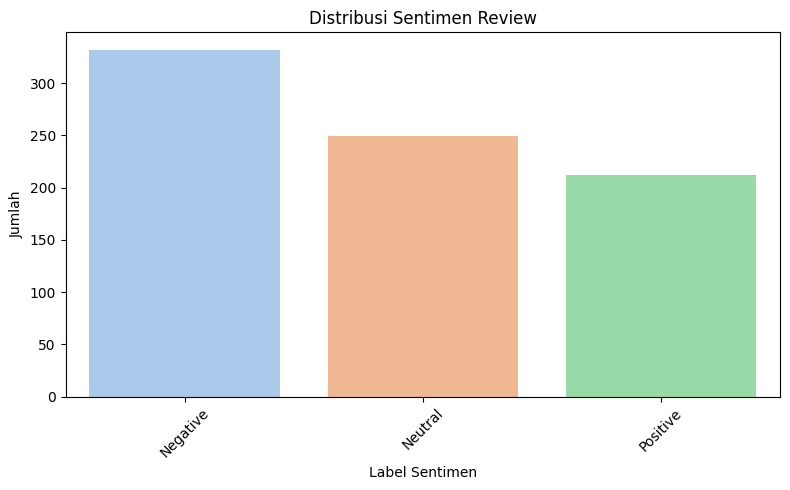

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_Aardiiiiy', order=data['sentiment_result_Aardiiiiy'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_hanifnoerr']

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 86.51%

Classification Report:
              precision    recall  f1-score   support

    positive       0.93      0.84      0.88       333
    negative       0.92      0.92      0.92       333
     neutral       0.62      0.78      0.69       127

    accuracy                           0.87       793
   macro avg       0.82      0.85      0.83       793
weighted avg       0.88      0.87      0.87       793


Confusion Matrix:
[[280  16  37]
 [  3 307  23]
 [ 19   9  99]]


In [15]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_crypter70'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))

Accuracy: 84.62%

Classification Report:
              precision    recall  f1-score   support

    positive       0.91      0.81      0.86       333
    negative       0.93      0.91      0.92       333
     neutral       0.58      0.77      0.66       127

    accuracy                           0.85       793
   macro avg       0.81      0.83      0.81       793
weighted avg       0.86      0.85      0.85       793


Confusion Matrix:
[[271  16  46]
 [  7 302  24]
 [ 21   8  98]]


In [16]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_w11wo'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 84.11%

Classification Report:
              precision    recall  f1-score   support

    positive       0.90      0.81      0.86       333
    negative       0.93      0.90      0.92       333
     neutral       0.56      0.75      0.64       127

    accuracy                           0.84       793
   macro avg       0.80      0.82      0.80       793
weighted avg       0.86      0.84      0.85       793


Confusion Matrix:
[[271  15  47]
 [  5 301  27]
 [ 24   8  95]]


In [17]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_ayameRushia'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 80.58%

Classification Report:
              precision    recall  f1-score   support

    positive       0.91      0.78      0.84       333
    negative       0.91      0.85      0.88       333
     neutral       0.49      0.75      0.59       127

    accuracy                           0.81       793
   macro avg       0.77      0.79      0.77       793
weighted avg       0.84      0.81      0.82       793


Confusion Matrix:
[[260  18  55]
 [  5 284  44]
 [ 21  11  95]]


In [18]:
# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['sentiment_result_Aardiiiiy'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 78.94%

Classification Report:
              precision    recall  f1-score   support

    positive       0.99      0.63      0.77       333
    negative       0.90      0.90      0.90       333
     neutral       0.47      0.91      0.62       127

    accuracy                           0.79       793
   macro avg       0.79      0.81      0.76       793
weighted avg       0.87      0.79      0.80       793


Confusion Matrix:
[[210  21 102]
 [  2 300  31]
 [  0  11 116]]


In [19]:
data[
    (data['sentiment'] == 'neutral') &
    (
        (data['sentiment_result_hanifnoerr'] != 'neutral')
        # (data['sentiment_result_crypter70'] != 'NEUTRAL') |
        # (data['sentiment_result_w11wo'] != 'Neutral') |
        # (data['sentiment_result_ayameRushia'] != 'Neutral')
    )
].head()

,review_text,sentiment,review_text_cleaned,sentiment_result_hanifnoerr,score_sentiment_result_hanifnoerr,sentiment_result_crypter70,score_sentiment_result_crypter70,sentiment_result_w11wo,score_sentiment_result_w11wo,sentiment_result_ayameRushia,score_sentiment_result_ayameRushia,sentiment_result_Aardiiiiy,score_sentiment_result_Aardiiiiy
679,Ayah,neutral,ayah,positive,0.994084,POSITIVE,0.733918,positive,0.964061,Positive,0.990425,Neutral,0.501583
682,Tempat kirim barang,neutral,tempat mengirim barang,positive,0.552602,POSITIVE,0.992401,neutral,0.814377,Positive,0.996828,Neutral,0.995475
685,Tidak ada komentar,neutral,tidak ada komentar,negative,0.999256,NEGATIVE,0.999870,positive,0.787742,Negative,0.755540,Neutral,0.865642
688,Ngambil uang,neutral,mengambil uang,negative,0.998593,NEUTRAL,0.815536,neutral,0.517648,Neutral,0.932053,Negative,0.985101
689,Pelayan standar,neutral,pelayan standar,negative,0.995900,NEGATIVE,0.999472,negative,0.995015,Negative,0.996343,Neutral,0.490488


In [20]:
def get_label_with_highest_score(row):
    label_scores = {}

    for label_col, score_col in [
        ('sentiment_result_hanifnoerr', 'score_sentiment_result_hanifnoerr'),
        ('sentiment_result_crypter70', 'score_sentiment_result_crypter70'),
        ('sentiment_result_w11wo', 'score_sentiment_result_w11wo'),
        ('sentiment_result_ayameRushia', 'score_sentiment_result_ayameRushia'),
        ('sentiment_result_Aardiiiiy', 'score_sentiment_result_Aardiiiiy')
    ]:
        label = str(row[label_col]).lower()
        score = row[score_col]

        if label in label_scores:
            label_scores[label] += score
        else:
            label_scores[label] = score

    return max(label_scores, key=label_scores.get)

# Terapkan
data['fix_sentiment'] = data.apply(get_label_with_highest_score, axis=1)

# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['fix_sentiment'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))


Accuracy: 85.75%

Classification Report:
              precision    recall  f1-score   support

    positive       0.93      0.82      0.87       333
    negative       0.94      0.92      0.93       333
     neutral       0.58      0.79      0.67       127

    accuracy                           0.86       793
   macro avg       0.82      0.84      0.82       793
weighted avg       0.88      0.86      0.86       793


Confusion Matrix:
[[273  12  48]
 [  2 307  24]
 [ 19   8 100]]


In [21]:
def get_label_with_highest_score(row):
    max_score = -float('inf')
    best_label = None

    for label_col, score_col in [
        ('sentiment_result_hanifnoerr', 'score_sentiment_result_hanifnoerr'),
        ('sentiment_result_crypter70', 'score_sentiment_result_crypter70'),
        ('sentiment_result_w11wo', 'score_sentiment_result_w11wo'),
        ('sentiment_result_ayameRushia', 'score_sentiment_result_ayameRushia'),
        ('sentiment_result_Aardiiiiy', 'score_sentiment_result_Aardiiiiy')
    ]:
        label = str(row[label_col]).lower()
        score = row[score_col]

        if score > max_score:
            max_score = score
            best_label = label

    return best_label

# Terapkan
data['fix_sentiment'] = data.apply(get_label_with_highest_score, axis=1)

# Update y_true and y_pred
y_true = data['sentiment']
y_pred = data['fix_sentiment'].str.lower()

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=['positive', 'negative','neutral']))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=['positive', 'negative','neutral']))

Accuracy: 86.00%

Classification Report:
              precision    recall  f1-score   support

    positive       0.92      0.81      0.87       333
    negative       0.94      0.92      0.93       333
     neutral       0.60      0.82      0.69       127

    accuracy                           0.86       793
   macro avg       0.82      0.85      0.83       793
weighted avg       0.88      0.86      0.87       793


Confusion Matrix:
[[271  14  48]
 [  5 307  21]
 [ 17   6 104]]


In [22]:
data['fix_sentiment'].value_counts()

fix_sentiment
negative    327
positive    293
neutral     173
Name: count, dtype: int64